In [1]:
!pip install scikit-optimize
!pip install ipython-autotime
!pip install tensorflow keras-tuner

%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.9 MB/s eta 0:00:00
time: 454 µs (started: 2025-05-19 11:28:58 +00:00)


In [2]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd
import seaborn as sns
# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')
import os
import time
# Modelling and Forecasting
# ==============================================================================
# import xgboost
# import lightgbm
# import catboost
# import sklearn
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor
# from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.neural_network import MLPRegressor

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

# print(f"Version scikit-learn: {sklearn.__version__}")
# print(f"Version lightgbm: {lightgbm.__version__}")
# print(f"Version xgboost: {xgboost.__version__}")
# print(f"Version catboost: {catboost.__version__}")

time: 11.3 s (started: 2025-05-19 11:28:58 +00:00)


In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_absolute_error

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



time: 248 ms (started: 2025-05-19 11:29:09 +00:00)


In [4]:
from google.colab import files

# Tải tệp lên từ máy tính
uploaded = files.upload()

data = pd.read_excel('WT_data_after_preprocessing.xlsx')

# Hiển thị dữ liệu
print(data.head())

Saving WT_data_after_preprocessing.xlsx to WT_data_after_preprocessing.xlsx
                 Time           P  windspeed  wind direct   air temp  \
0 2022-11-05 14:00:00  274.000000   7.690833    59.300000  24.841667   
1 2022-11-05 18:00:00  259.583333   7.807500    78.308333  22.900000   
2 2022-11-05 22:00:00    0.000000   0.000000    92.500000  23.091667   
3 2022-11-05 23:00:00    0.000000   0.000000    92.500000  22.966667   
4 2022-11-06 00:00:00    0.000000   0.000000    92.500000  23.033333   

    humidity  irrad global horizontal  irrad plant of array     pressure  \
0  72.066667                   380.75                 366.0  1015.000000   
1  79.883333                     0.00                   0.0  1016.000000   
2  80.200000                     0.00                   0.0  1017.500000   
3  81.383333                     0.00                   0.0  1017.000000   
4  81.883333                     0.00                   0.0  1016.333333   

   rain fall  ...  wind direction 

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3508 entries, 0 to 3507
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Time                     3508 non-null   datetime64[ns]
 1   P                        3508 non-null   float64       
 2   windspeed                3508 non-null   float64       
 3   wind direct              3508 non-null   float64       
 4   air temp                 3508 non-null   float64       
 5   humidity                 3508 non-null   float64       
 6   irrad global horizontal  3508 non-null   float64       
 7   irrad plant of array     3508 non-null   float64       
 8   pressure                 3508 non-null   float64       
 9   rain fall                3508 non-null   float64       
 10  temp 1                   3508 non-null   float64       
 11  temp 2                   3508 non-null   float64       
 12  temp 3                   3508 non-

In [6]:
# Cliclical encoding of calendar and sunlight features
# ==============================================================================
def cyclical_encoding(data: pd.Series, cycle_length: int) -> pd.DataFrame:
    """
    Encode a cyclical feature with two new features sine and cosine.
    The minimum value of the feature is assumed to be 0. The maximum value
    of the feature is passed as an argument.

    Parameters
    ----------
    data : pd.Series
        Series with the feature to encode.
    cycle_length : int
        The length of the cycle. For example, 12 for months, 24 for hours, etc.
        This value is used to calculate the angle of the sin and cos.

    Returns
    -------
    result : pd.DataFrame
        Dataframe with the two new features sin and cos.

    """

    sin = np.sin(2 * np.pi * data/cycle_length)
    cos = np.cos(2 * np.pi * data/cycle_length)
    result =  pd.DataFrame({
                  f"{data.name}_sin": sin,
                  f"{data.name}_cos": cos
              })

    return result


month_encoded = cyclical_encoding(data['month'], cycle_length=12)
week_day_encoded = cyclical_encoding(data['weekday'], cycle_length=7)
hour_day_encoded = cyclical_encoding(data['hour'], cycle_length=24)



cyclical_features = pd.concat([
                        month_encoded,
                        week_day_encoded,
                        hour_day_encoded
                    ], axis=1)

data = pd.concat([data, cyclical_features], axis=1)
data.describe(include = 'all')

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



,Time,P,windspeed,wind direct,air temp,humidity,irrad global horizontal,irrad plant of array,pressure,rain fall,...,week,weekday,day_str,year_month,month_sin,month_cos,weekday_sin,weekday_cos,hour_sin,hour_cos
count,3508,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,...,3508.000000,3508.000000,3508,3508,3508.000000,3.508000e+03,3.508000e+03,3508.000000,3508.000000,3.508000e+03
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7,15,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Sun,2023_11,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,569,374,NaN,NaN,NaN,NaN,NaN,NaN
mean,2023-06-20 12:17:18.540478976,173.985080,6.419668,129.987486,25.834587,82.596522,129.678592,118.616554,1009.066534,0.000066,...,30.663911,4.061288,NaN,NaN,-0.123526,7.852763e-02,-4.206812e-03,0.033185,-0.101204,6.944543e-02
min,2022-11-05 14:00:00,0.000000,0.000000,10.102500,13.666667,48.558333,0.000000,0.000000,993.000000,0.000000,...,1.000000,1.000000,NaN,NaN,-1.000000,-1.000000e+00,-9.749279e-01,-0.900969,-1.000000,-1.000000e+00
25%,2023-03-08 20:45:00,77.332708,5.146875,75.731250,22.583333,78.993750,0.000000,0.000000,1003.000000,0.000000,...,19.000000,2.000000,NaN,NaN,-0.500000,-5.000000e-01,-7.818315e-01,-0.900969,-0.866025,-5.000000e-01
50%,2023-06-30 01:30:00,152.625000,6.296250,103.745833,26.500000,84.054167,0.216667,0.191667,1009.416667,0.000000,...,32.000000,4.000000,NaN,NaN,-0.500000,6.123234e-17,-2.449294e-16,-0.222521,-0.258819,6.123234e-17
75%,2023-09-24 18:15:00,263.479167,7.571042,194.250000,29.408333,88.000000,163.854167,152.037500,1014.416667,0.000000,...,45.000000,6.000000,NaN,NaN,0.500000,8.660254e-01,7.818315e-01,0.623490,0.707107,7.071068e-01
max,2024-01-01 23:00:00,473.916667,17.550000,353.916667,35.233333,94.000000,981.833333,966.333333,1027.583333,0.033333,...,52.000000,7.000000,NaN,NaN,1.000000,1.000000e+00,9.749279e-01,1.000000,1.000000,1.000000e+00


time: 79.3 ms (started: 2025-05-19 11:31:17 +00:00)


In [7]:
exog_features = data.columns
elements_to_remove = ['day_str',	'year_month',	'distance' , 'P','year','distance_to_smooth_curve', 'P_wind_bin', 'windspeed_bin','P','year','distance_to_smooth_curve', 'P_wind_bin', 'windspeed_bin','Q','S','Time',
 'month',
 'week',
 'hour',
 'weekday',
 'day']
exog_features = [item for item in exog_features if item not in elements_to_remove]

time: 1.21 ms (started: 2025-05-19 11:31:26 +00:00)


In [8]:
exog_features

['windspeed',
 'wind direct',
 'air temp',
 'humidity',
 'irrad global horizontal',
 'irrad plant of array',
 'pressure',
 'rain fall',
 'temp 1',
 'temp 2',
 'temp 3',
 'wind direction',
 'wind speed',
 'month_sin',
 'month_cos',
 'weekday_sin',
 'weekday_cos',
 'hour_sin',
 'hour_cos']

time: 5.23 ms (started: 2025-05-19 11:31:27 +00:00)


*************************************************************************
**********************************P********************************
*************************************************************************


<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDrive2ImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_GenerativeAIImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:1047: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



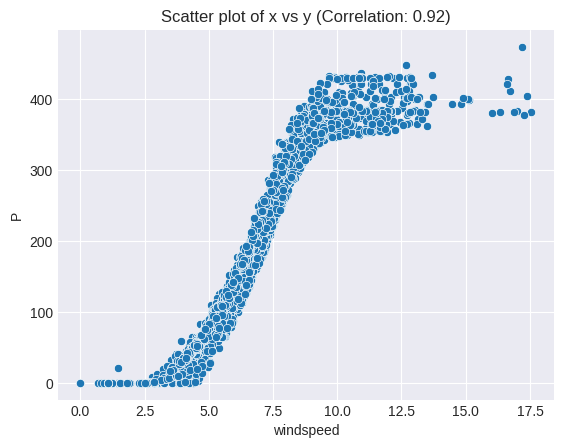

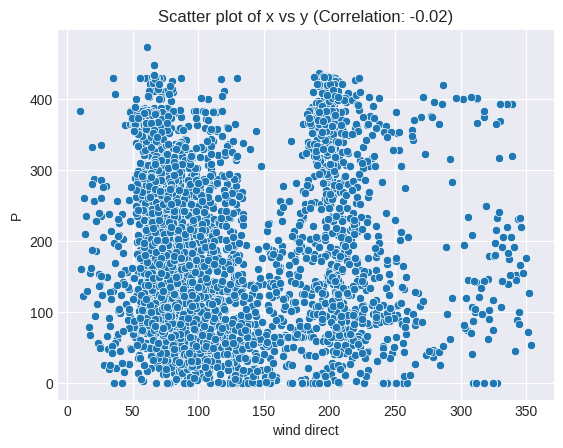

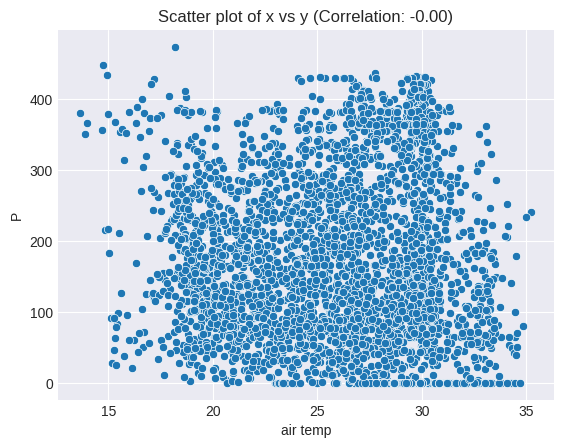

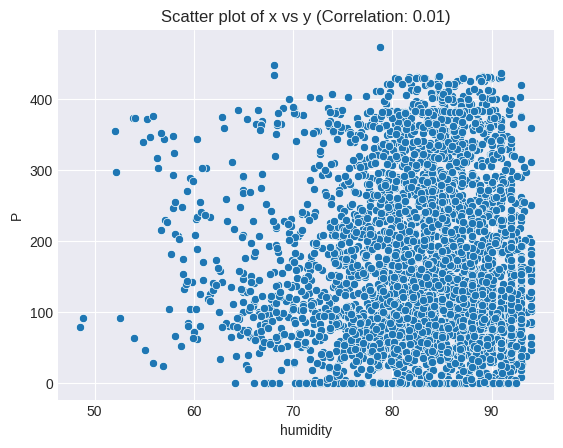

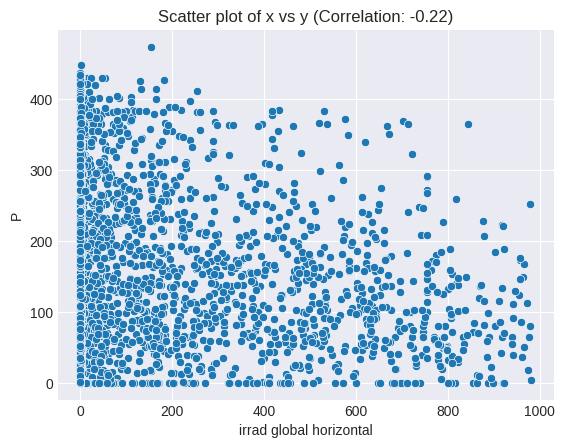

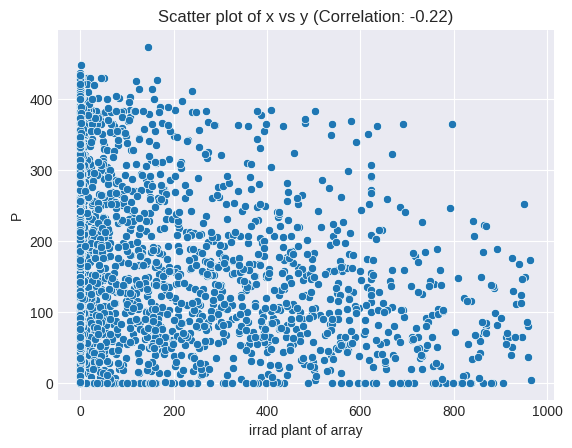

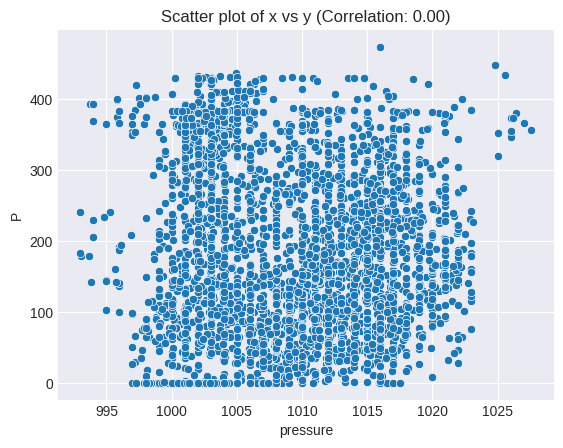

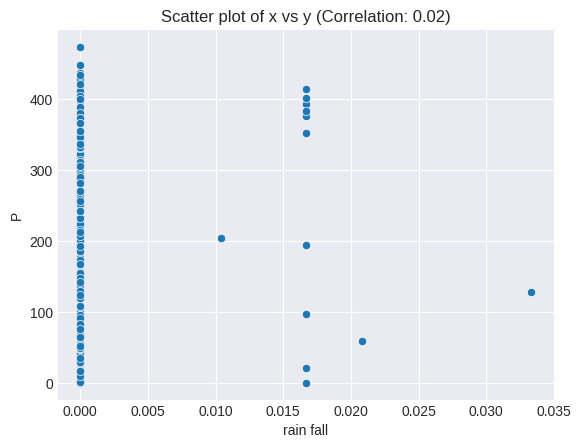

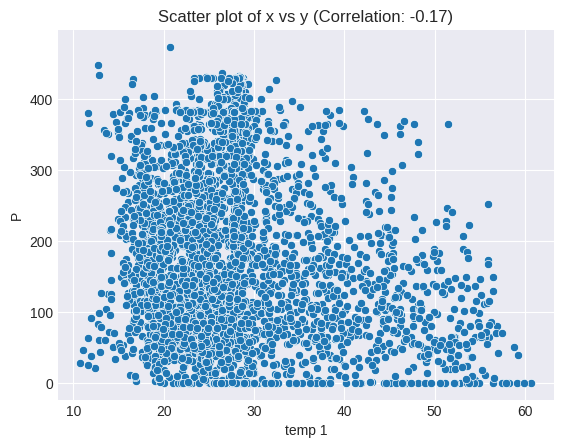

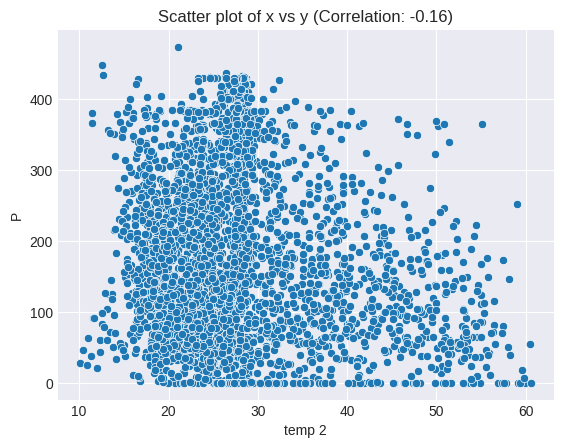

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning:

invalid value encountered in divide



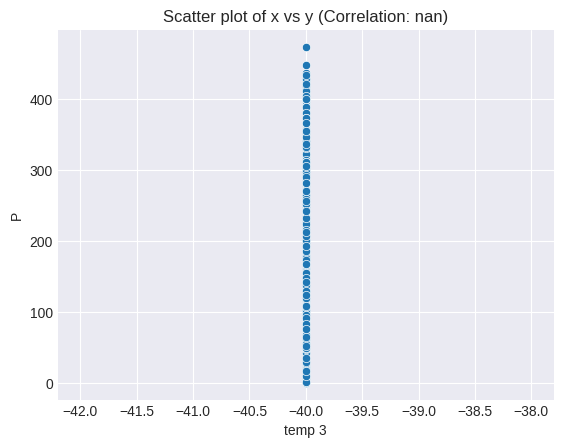

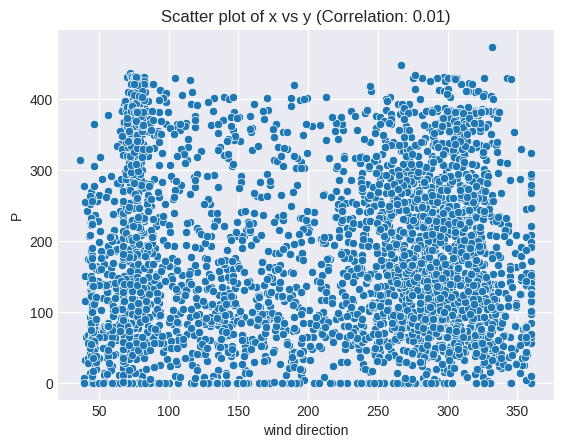

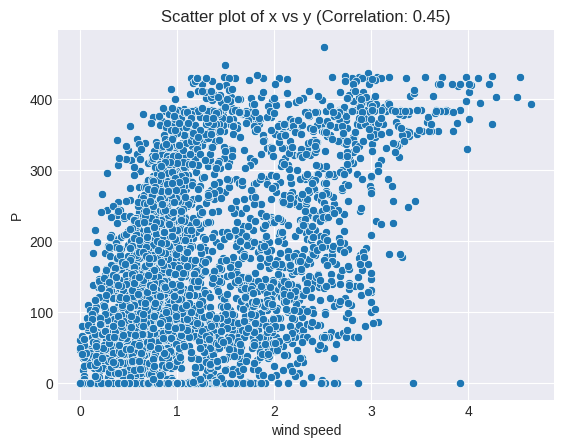

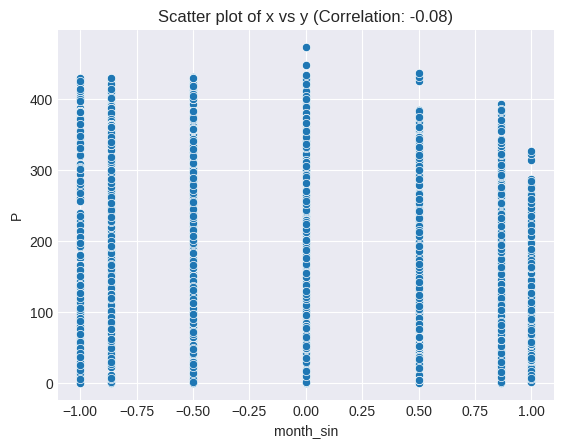

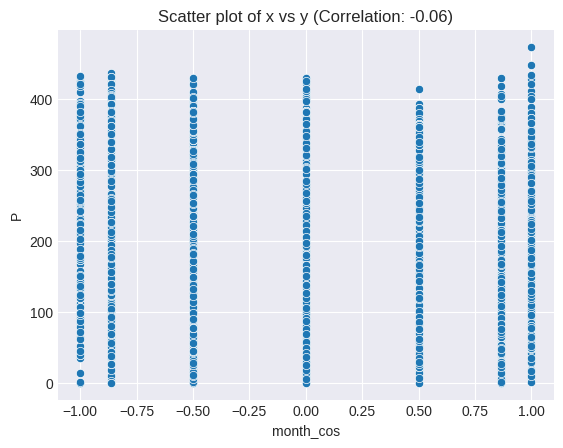

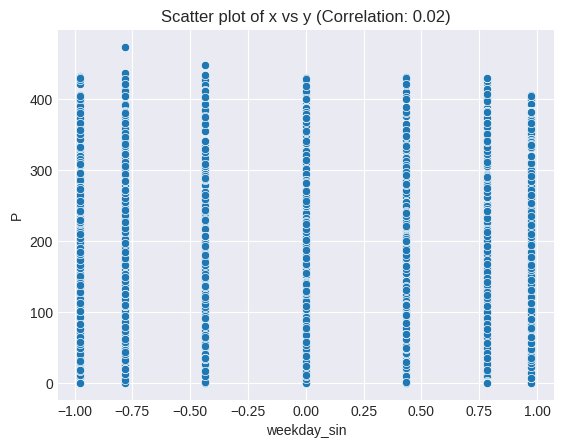

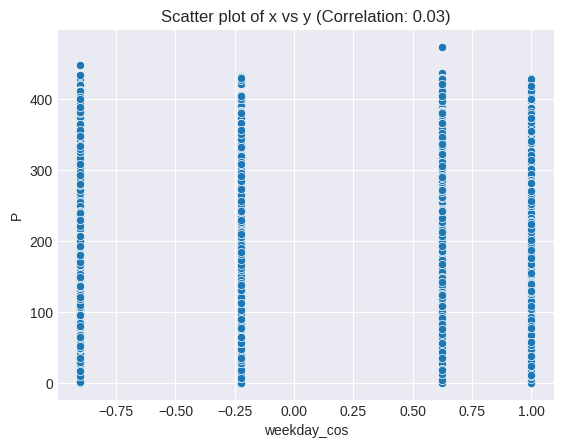

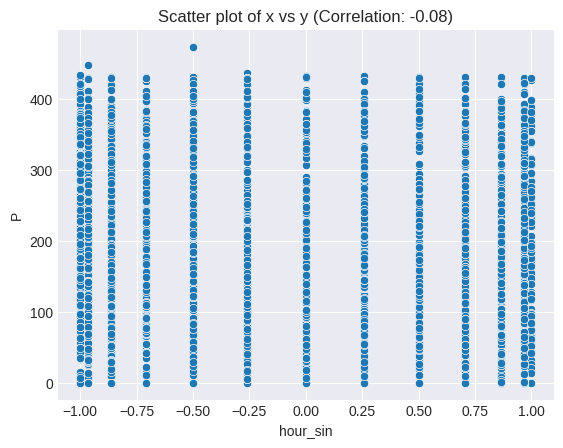

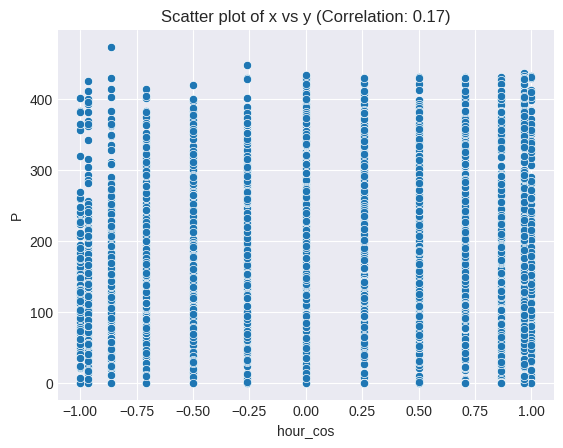

['windspeed', 'wind speed']
time: 5.56 s (started: 2025-05-19 11:31:30 +00:00)


In [9]:
target = 'P'
fe =[]
print("*************************************************************************")
print("**********************************"+target+"********************************")
print("*************************************************************************")
for i in exog_features:
    correlation = data[target].corr(data[i])
    # Vẽ biểu đồ
    sns.scatterplot(data=data, y=target, x=i)
    # Đặt tiêu đề với hệ số tương quan
    plt.title(f'Scatter plot of x vs y (Correlation: {correlation:.2f})')
    if abs(correlation)> 0.25: fe.append(i)
    plt.show()
print(fe)

# All

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# Original split with ID tracking
X = data[exog_features]  # Exclude ID here for training and prediction
y = data["P"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2529)

# Resetting index to avoid misalignment after splitting
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

time: 5.28 ms (started: 2025-05-19 11:31:38 +00:00)


In [11]:
start_time = time.time()
search_spaces  = {
    'solver': Categorical(['lbfgs','adam']),
    'max_iter': Integer( 100, 500),
    'random_state': Integer(0,1)
    }

initial_model = MLPRegressor(random_state=123)
initial_model.fit(X_train, y_train)
# Use TimeSeriesSplit for cross-validation
n_splits = 5  # Number of splits for cross-validation
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
# Regressor hyperparameters search space
opt = BayesSearchCV(
    estimator=initial_model,
    search_spaces=search_spaces,
    n_iter=100,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    random_state=42,
    cv=cv_strategy # This is a custom cv strategy that only uses test data
)
# Tiến hành tối ưu hóa
opt.fit(X_train, y_train)

# Kết quả
print("Best parameters found: ", opt.best_params_)
print("Best cross-validation score: ", opt.best_score_)
end_time = time.time()
turning_time = end_time - start_time
print(turning_time)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (264) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (264) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (264) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (264) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (sta

Best parameters found:  OrderedDict([('max_iter', 291), ('random_state', 1), ('solver', 'adam')])
Best cross-validation score:  -33.192328617029496
2146.513820886612
time: 35min 46s (started: 2025-05-19 11:31:39 +00:00)


In [12]:
best_model = MLPRegressor(**opt.best_params_)
best_model.fit(X_train, y_train)

start_time = time.time()
# Predict on the test set
y_test_pred = opt.predict(X_test)
y_test_pred2 = best_model.predict(X_test)
end_time = time.time()
test_time = end_time - start_time
print(test_time)
# Evaluate using Mean Absolute Error (or another metric)
test_score = mean_absolute_error(y_test, y_test_pred)
print("Validation set mean absolute error:", test_score)

print(np.mean(y_test))
print(np.mean(y_test_pred))

0.006219148635864258
Validation set mean absolute error: 38.14140410281631
169.46740657644824
186.80864871402756
time: 4.54 s (started: 2025-05-19 12:08:26 +00:00)


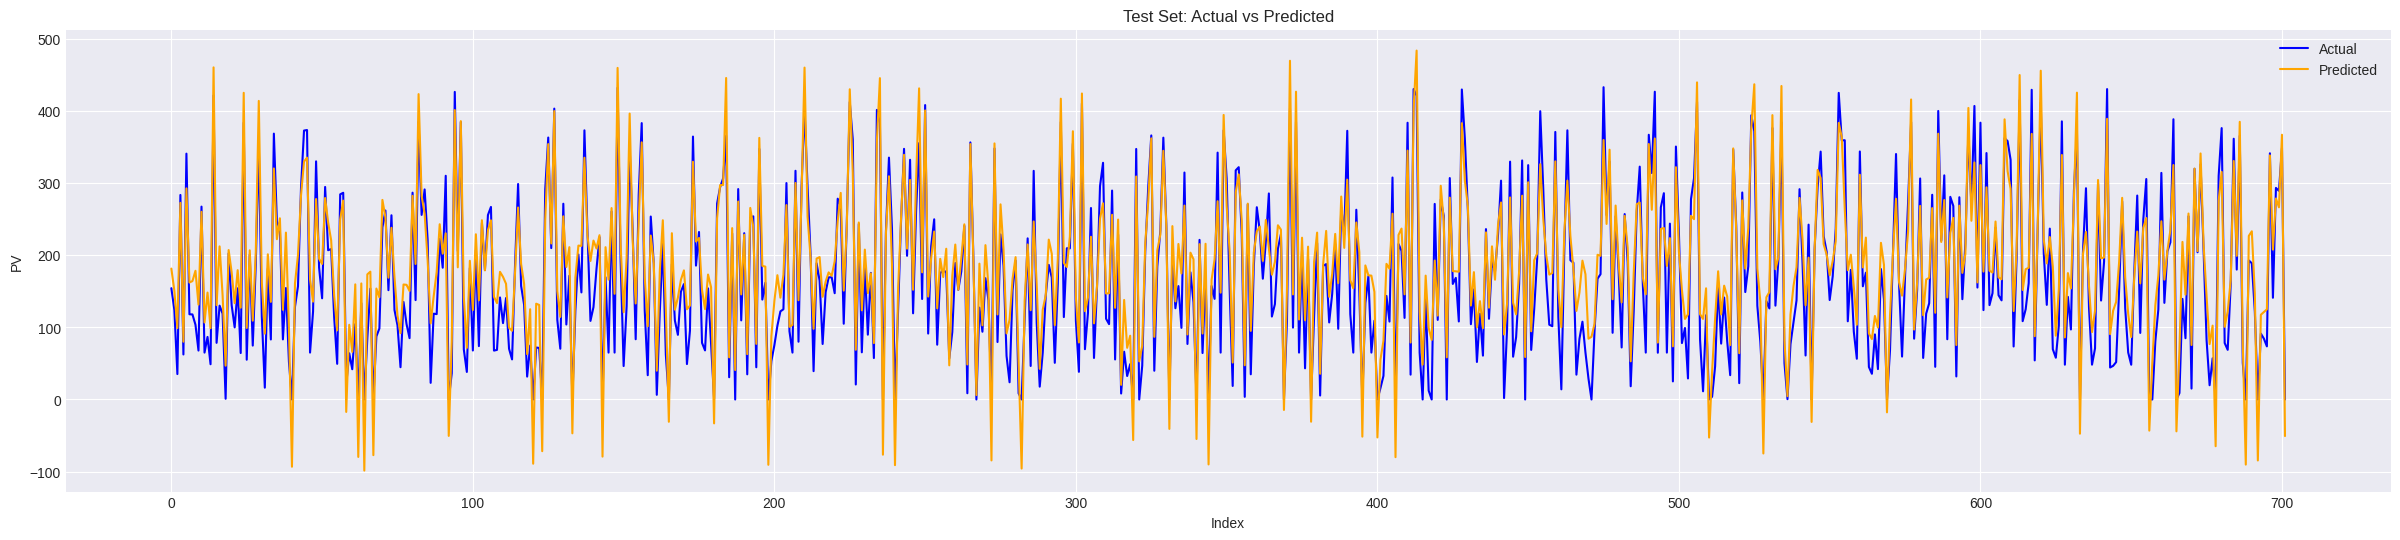

time: 536 ms (started: 2025-05-19 12:08:37 +00:00)


In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Assuming y_val and y_val_pred have the same index for easy plotting
y_test_series = pd.Series(y_test, index=y_test.index)  # Ensure y_val is a Series with the correct index

# Plot the actual vs predicted values
plt.figure(figsize=(30, 6))
plt.plot(y_test_series.index, y_test_series, label='Actual', color='b')
plt.plot(y_test_series.index, y_test_pred, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('PV')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Test error
# ==============================================================================
y_true = y_test
y_pred = y_test_pred2
#y_pred = y_pred.values.reshape(-1)

# Tính MSE và MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #lỗi do y_true có gtri = 0

# Tính Relative MAE (rel_mae)
mean_actual = np.mean(y_true)
rel_mae = 100 * (mae / mean_actual)
rel_rmse = 100 * (rmse / mean_actual)


# Hiển thị các kết quả
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'Relative MAE: {rel_mae}%')
print(f'Relative RMSE: {rel_rmse}%')

MSE: 2034.2389967365807
RMSE: 45.10253869502892
MAE: 38.14140410281631
MAPE: inf%
Relative MAE: 22.506631141257472%
Relative RMSE: 26.61428507474254%
time: 5.38 ms (started: 2025-05-19 12:08:42 +00:00)


In [15]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/19_5/MLP_wind_all_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(opt, f)

Mounted at /content/drive
time: 16 s (started: 2025-05-19 12:09:01 +00:00)


In [16]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
train_time = turning_time
save_data = {'MSE': mse, 'MAE' : mae,'RMSE' : rmse, 'Relative MAE' : rel_mae, 'Relative RMSE' : rel_rmse, 'train time' : train_time, 'test time' :test_time}

with open('/content/drive/MyDrive/19_5/wind_MLP_all.pkl', 'wb') as f:
  pickle.dump(save_data, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.46 s (started: 2025-05-19 12:09:17 +00:00)


# Selected

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# Original split with ID tracking
X = data[fe]  # Exclude ID here for training and prediction
y = data["P"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=2529)

# Resetting index to avoid misalignment after splitting
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

time: 9.62 ms (started: 2025-05-19 12:09:19 +00:00)


In [18]:
start_time = time.time()
search_spaces  = {
    'solver': Categorical(['lbfgs','adam']),
    'max_iter': Integer( 100, 500),
    'random_state': Integer(0,1)
    }

initial_model = MLPRegressor(random_state=123)
initial_model.fit(X_train, y_train)
# Use TimeSeriesSplit for cross-validation
n_splits = 5  # Number of splits for cross-validation
cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)
# Regressor hyperparameters search space
opt = BayesSearchCV(
    estimator=initial_model,
    search_spaces=search_spaces,
    n_iter=100,
    scoring=make_scorer(mean_absolute_error, greater_is_better=False),
    random_state=42,
    cv=cv_strategy # This is a custom cv strategy that only uses test data
)
# Tiến hành tối ưu hóa
opt.fit(X_train, y_train)

# Kết quả
print("Best parameters found: ", opt.best_params_)
print("Best cross-validation score: ", opt.best_score_)
end_time = time.time()
turning_time = end_time - start_time
print(turning_time)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (264) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (264) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (264) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum

Best parameters found:  OrderedDict([('max_iter', 500), ('random_state', 1), ('solver', 'lbfgs')])
Best cross-validation score:  -12.4917968549311
1896.9693925380707
time: 31min 36s (started: 2025-05-19 12:09:19 +00:00)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



In [19]:
best_model = MLPRegressor(**opt.best_params_)
best_model.fit(X_train, y_train)

start_time = time.time()
# Predict on the test set
y_test_pred = opt.predict(X_test)
y_test_pred2 = best_model.predict(X_test)
end_time = time.time()
test_time = end_time - start_time
print(test_time)
# Evaluate using Mean Absolute Error (or another metric)
test_score = mean_absolute_error(y_test, y_test_pred)
print("Validation set mean absolute error:", test_score)

print(np.mean(y_test))
print(np.mean(y_test_pred))

0.011366844177246094
Validation set mean absolute error: 13.05218717947301
169.46740657644824
169.4976391284288
time: 4.29 s (started: 2025-05-19 12:40:56 +00:00)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



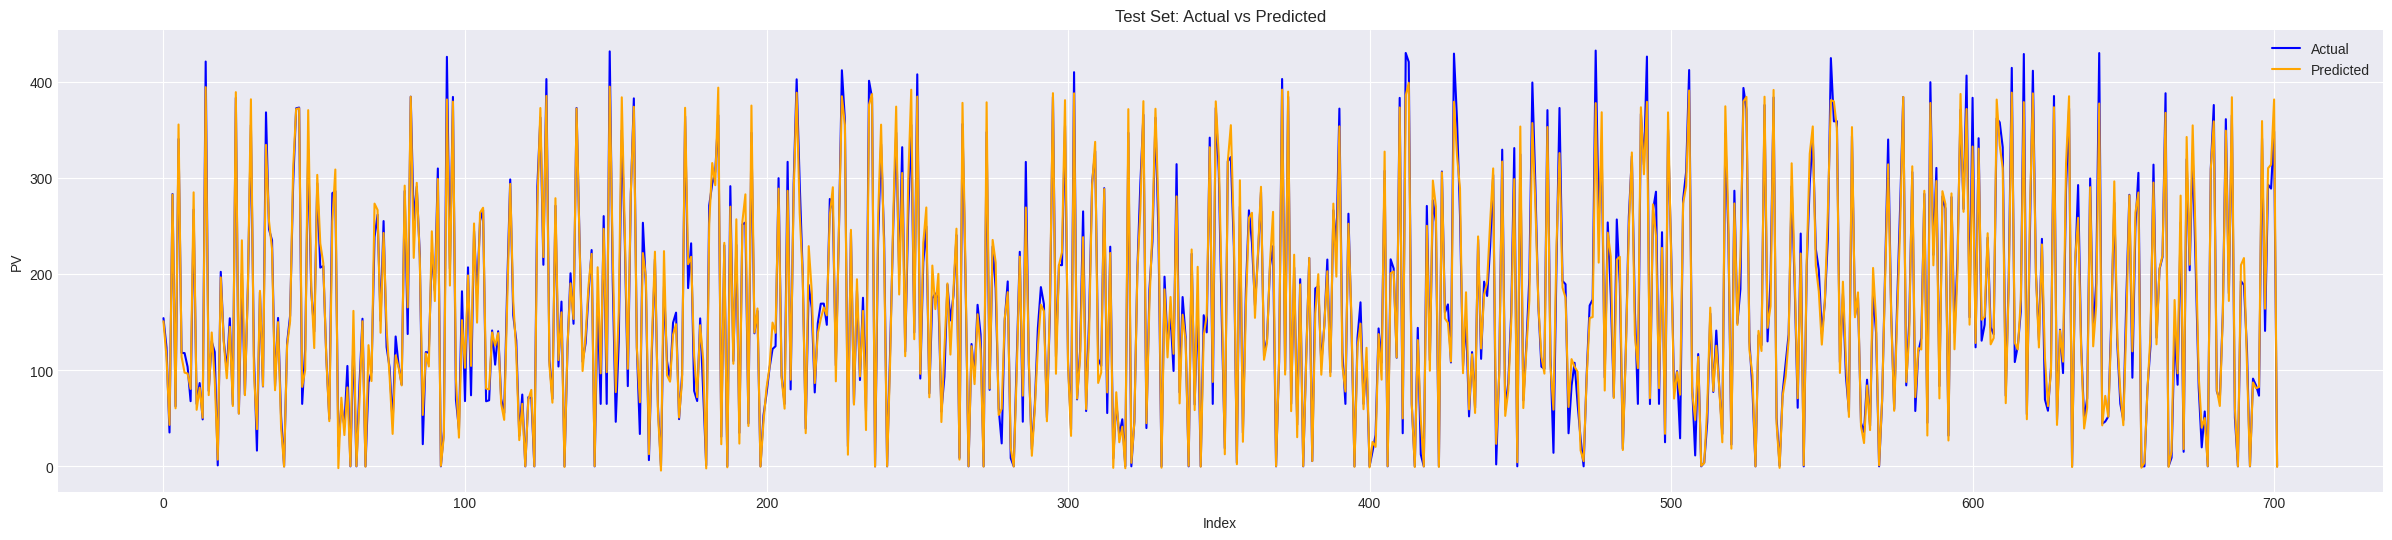

time: 414 ms (started: 2025-05-19 12:41:00 +00:00)


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# Assuming y_val and y_val_pred have the same index for easy plotting
y_test_series = pd.Series(y_test, index=y_test.index)  # Ensure y_val is a Series with the correct index

# Plot the actual vs predicted values
plt.figure(figsize=(30, 6))
plt.plot(y_test_series.index, y_test_series, label='Actual', color='b')
plt.plot(y_test_series.index, y_test_pred, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('PV')
plt.title('Test Set: Actual vs Predicted')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Test error
# ==============================================================================
y_true = y_test
y_pred = y_test_pred2
#y_pred = y_pred.values.reshape(-1)

# Tính MSE và MAE
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)

# Tính MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100 #lỗi do y_true có gtri = 0

# Tính Relative MAE (rel_mae)
mean_actual = np.mean(y_true)
rel_mae = 100 * (mae / mean_actual)
rel_rmse = 100 * (rmse / mean_actual)


# Hiển thị các kết quả
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}%')
print(f'Relative MAE: {rel_mae}%')
print(f'Relative RMSE: {rel_rmse}%')

MSE: 299.73223063445585
RMSE: 17.312776514310343
MAE: 13.05218717947301
MAPE: inf%
Relative MAE: 7.701886423561367%
Relative RMSE: 10.215991891337758%
time: 12.1 ms (started: 2025-05-19 12:41:00 +00:00)


In [22]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
model_path = '/content/drive/MyDrive/19_5/MLP_wind_selected_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(opt, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.48 s (started: 2025-05-19 12:52:16 +00:00)


In [23]:
import pickle
from google.colab import drive
drive.mount('/content/drive')
train_time = turning_time
save_data = {'MSE': mse, 'MAE' : mae,'RMSE' : rmse, 'Relative MAE' : rel_mae, 'Relative RMSE' : rel_rmse, 'train time' : train_time, 'test time' :test_time}

with open('/content/drive/MyDrive/19_5/wind_MLP_selected.pkl', 'wb') as f:
  pickle.dump(save_data, f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 1.41 s (started: 2025-05-19 12:52:19 +00:00)
